In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection  import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df = pd.read_csv("hour.csv")

In [3]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Preprocessing

In [4]:
df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_situation',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'registered': 'registered_count',
    'cnt': 'total_count'
}, inplace=True)

In [5]:
df.head()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered_count,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   day_of_week        17379 non-null  int64  
 8   is_working_day     17379 non-null  int64  
 9   weather_situation  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  feels_like_temp    17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  wind_speed         17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered_count   17379 non-null  int64  
 16  total_count        173

In [7]:
df.apply(lambda x: len(x.unique()))

instant              17379
date                   731
season                   4
year                     2
month                   12
hour                    24
is_holiday               2
day_of_week              7
is_working_day           2
weather_situation        4
temp                    50
feels_like_temp         65
humidity                89
wind_speed              30
casual                 322
registered_count       776
total_count            869
dtype: int64

In [8]:
df.describe()

,instant,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered_count,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
df.isnull().sum()

instant              0
date                 0
season               0
year                 0
month                0
hour                 0
is_holiday           0
day_of_week          0
is_working_day       0
weather_situation    0
temp                 0
feels_like_temp      0
humidity             0
wind_speed           0
casual               0
registered_count     0
total_count          0
dtype: int64

INSIGHTS
-- We can confidently confirm that the dataset is complete and contains no null or missing entries. This ensures that the analyses performed on this dataset are not biased or impacted by incomplete data.--

In [10]:
# Change Datatype
df['date'] = pd.to_datetime(df['date'])

# Data Visualization

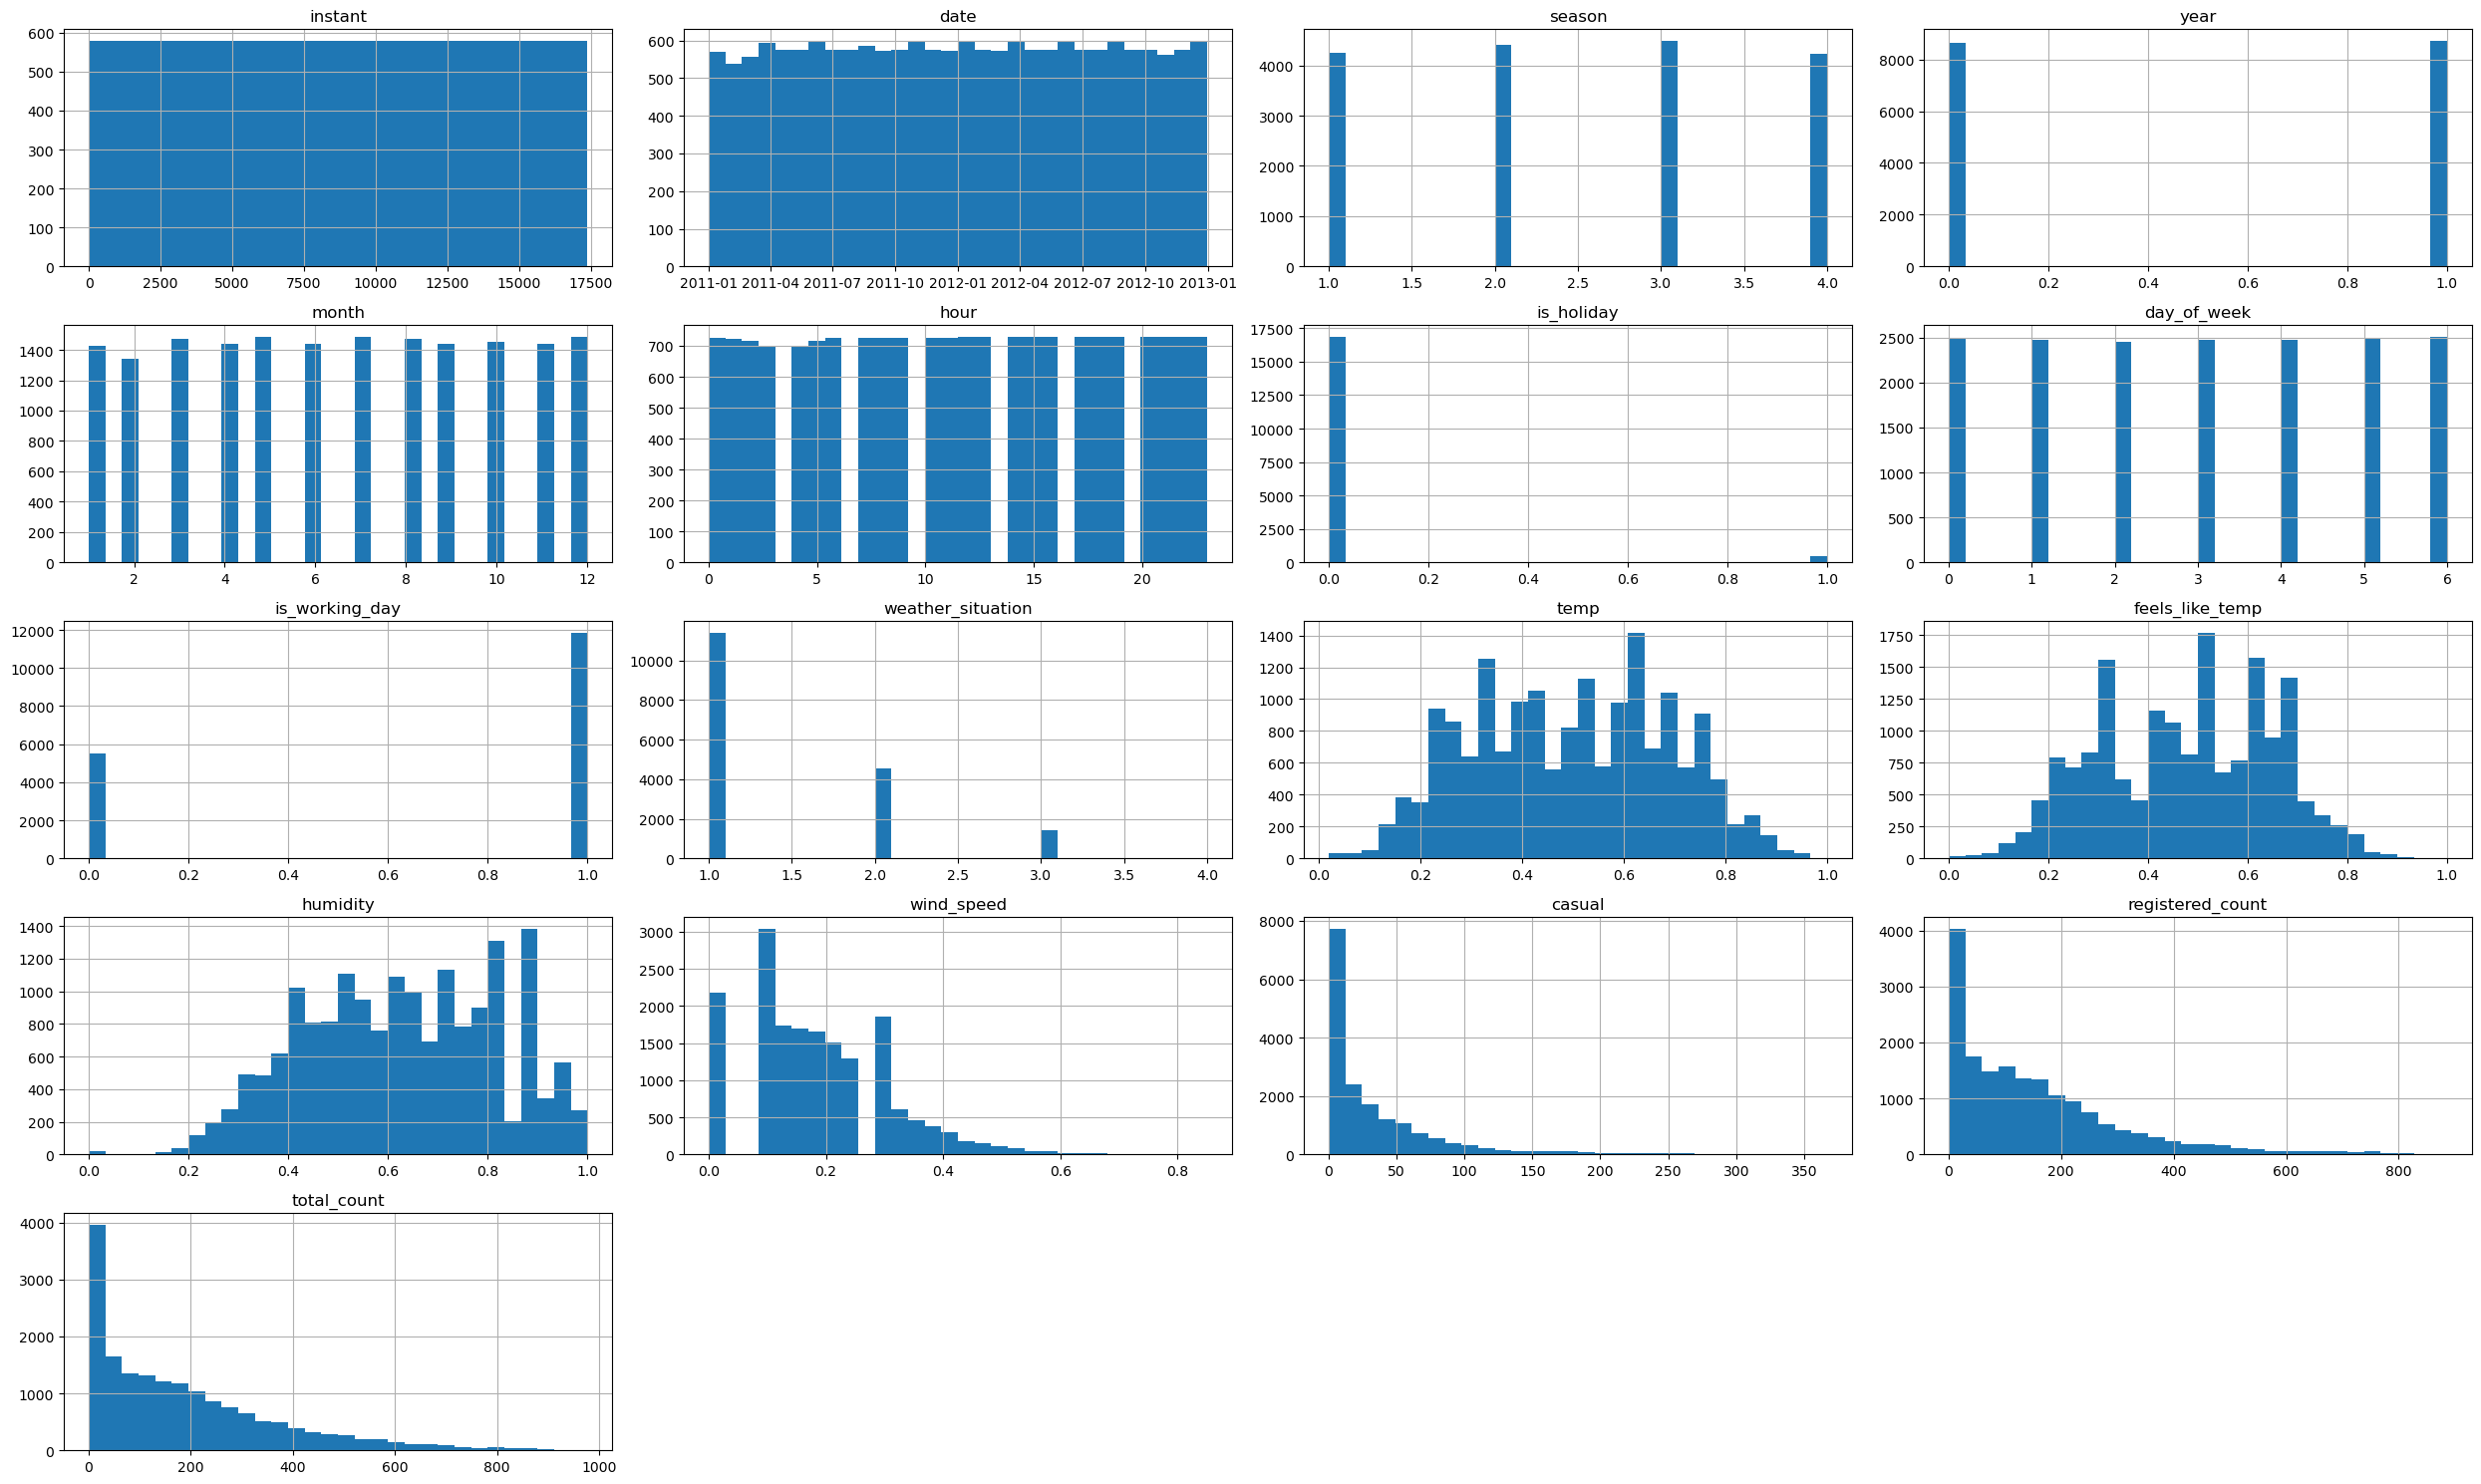

In [11]:
df.hist(bins=30, figsize=(25, 15))
plt.tight_layout()
plt.show()

# Bivariate Analysis

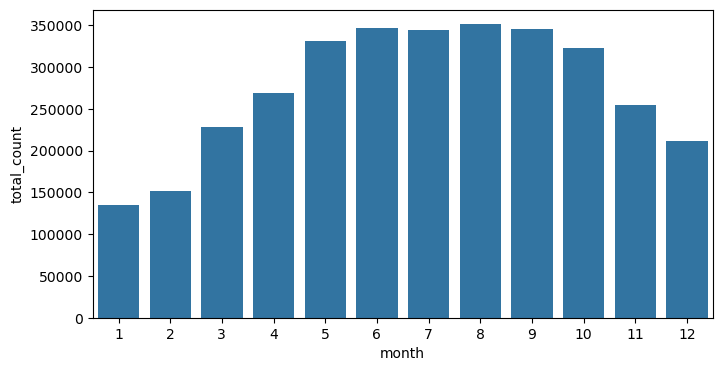

In [12]:
plt.figure(figsize=(8,4))
month = df.groupby("month").sum(numeric_only=True).reset_index()
sns.barplot(data=month,x="month",y="total_count")
plt.show()

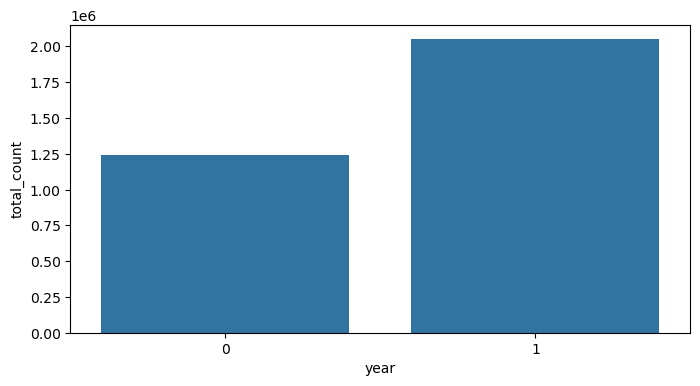

In [13]:
plt.figure(figsize=(8,4))
year = df.groupby("year").sum(numeric_only=True).reset_index()
sns.barplot(data=year,x="year",y="total_count")
plt.show()

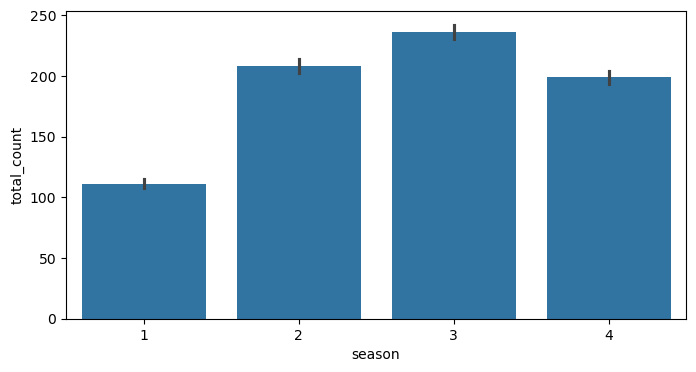

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="season",y="total_count")
plt.show()

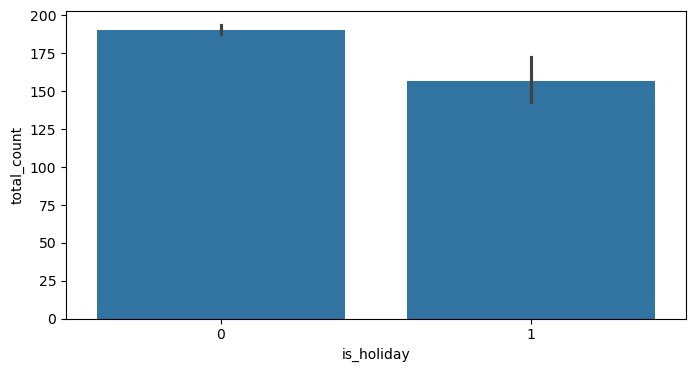

In [15]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="is_holiday",y="total_count")
plt.show()

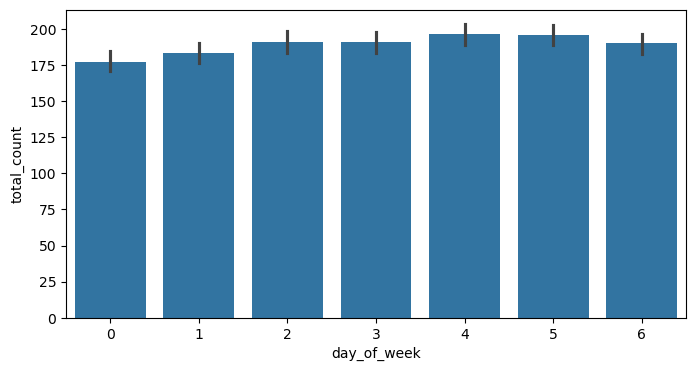

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="day_of_week",y="total_count")
plt.show()

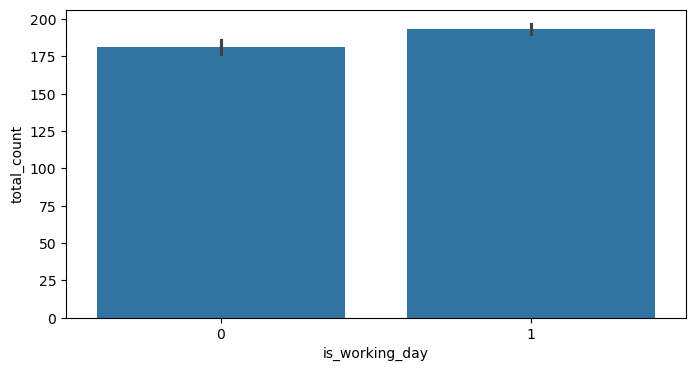

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="is_working_day",y="total_count")
plt.show()

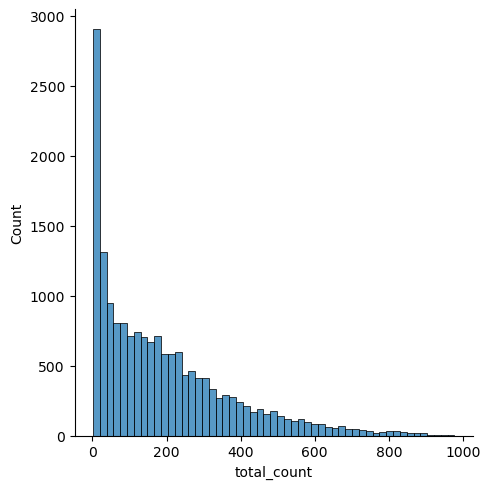

In [18]:
sns.displot(df["total_count"])
plt.show()

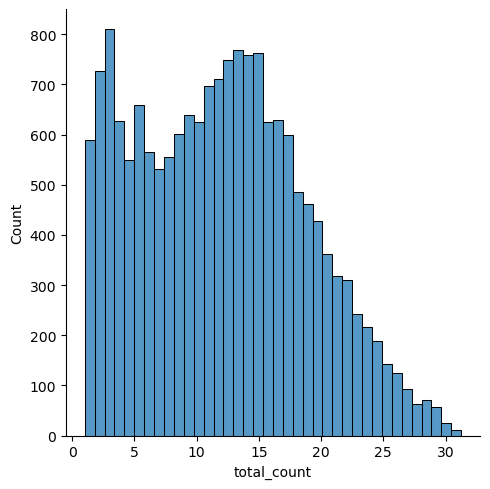

In [19]:
sns.displot(np.sqrt(df["total_count"]))
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different months')]

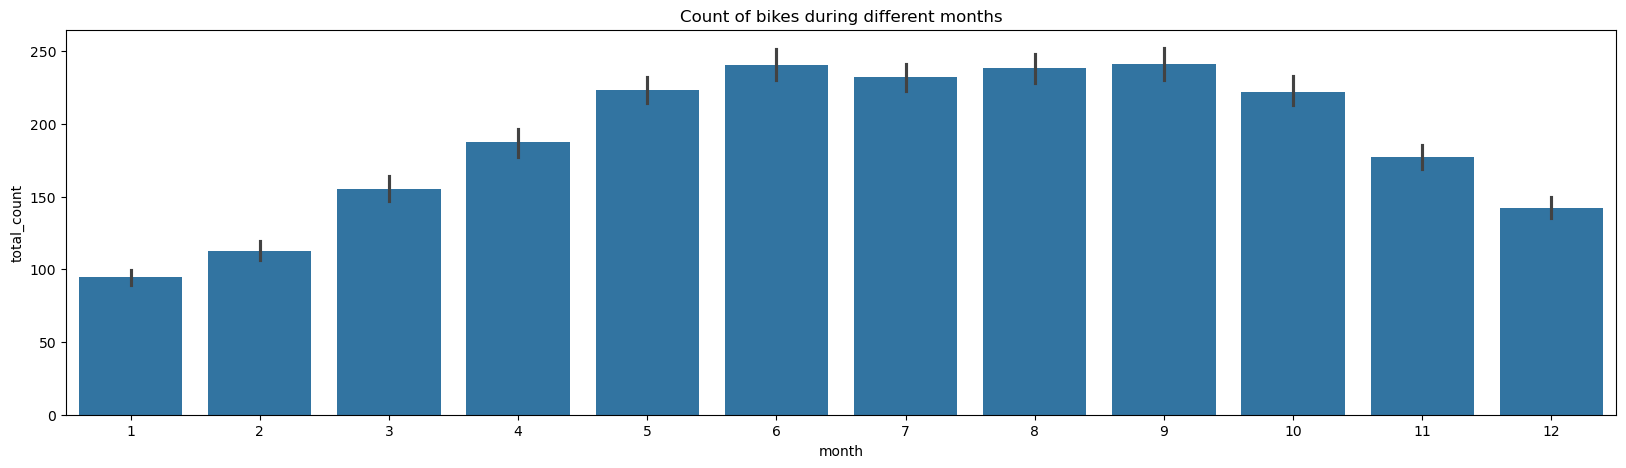

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='month', y='total_count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

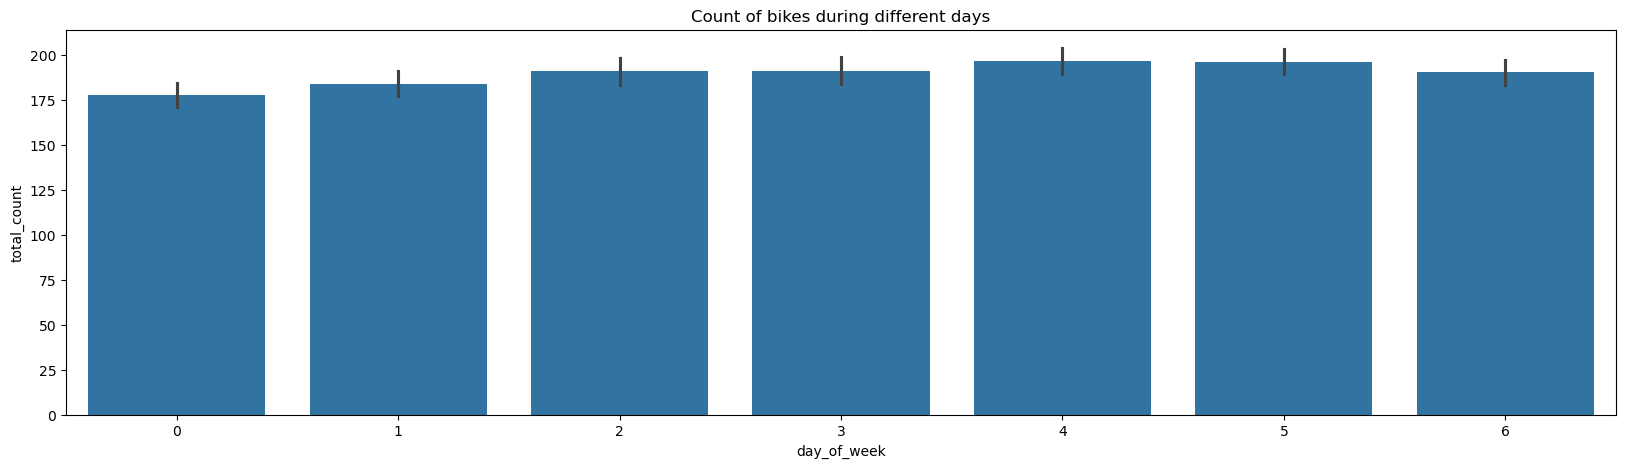

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='day_of_week', y='total_count', ax=ax)
ax.set(title='Count of bikes during different days')

# Correlation

<Axes: >

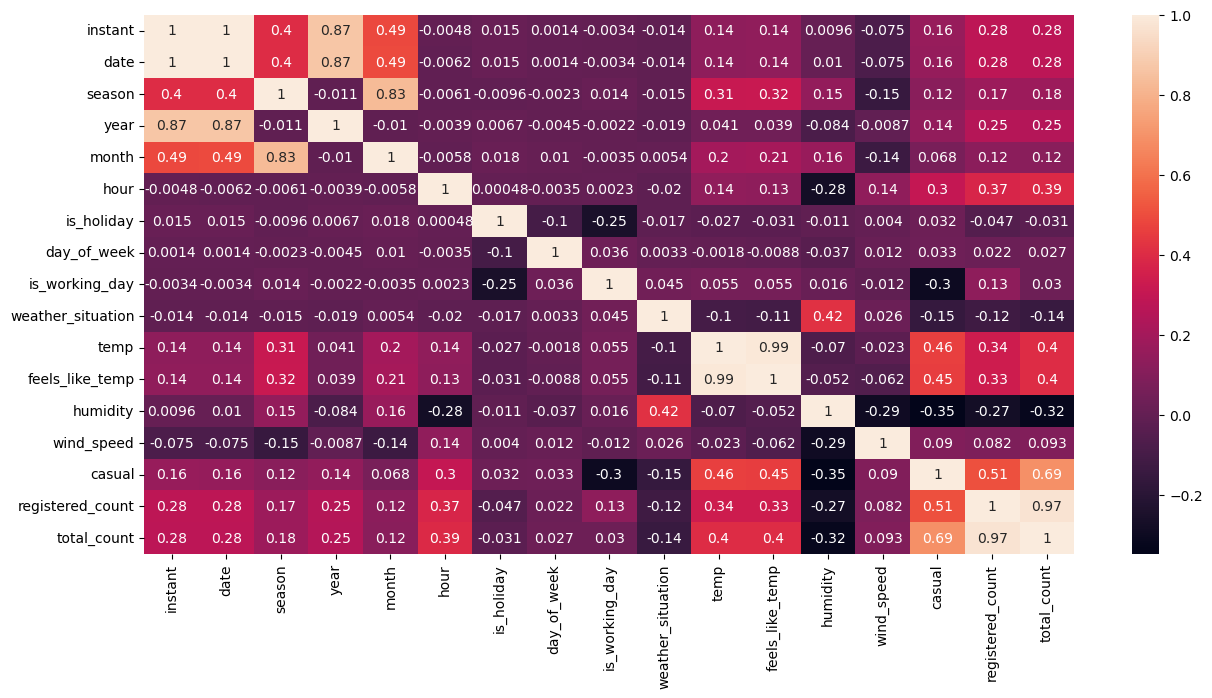

In [22]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

Insights -- This heatmap shows all the columns and rows

In [23]:
df.corr()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered_count,total_count
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
date,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
month,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
is_holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
day_of_week,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
is_working_day,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weather_situation,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


# Handling Outlier

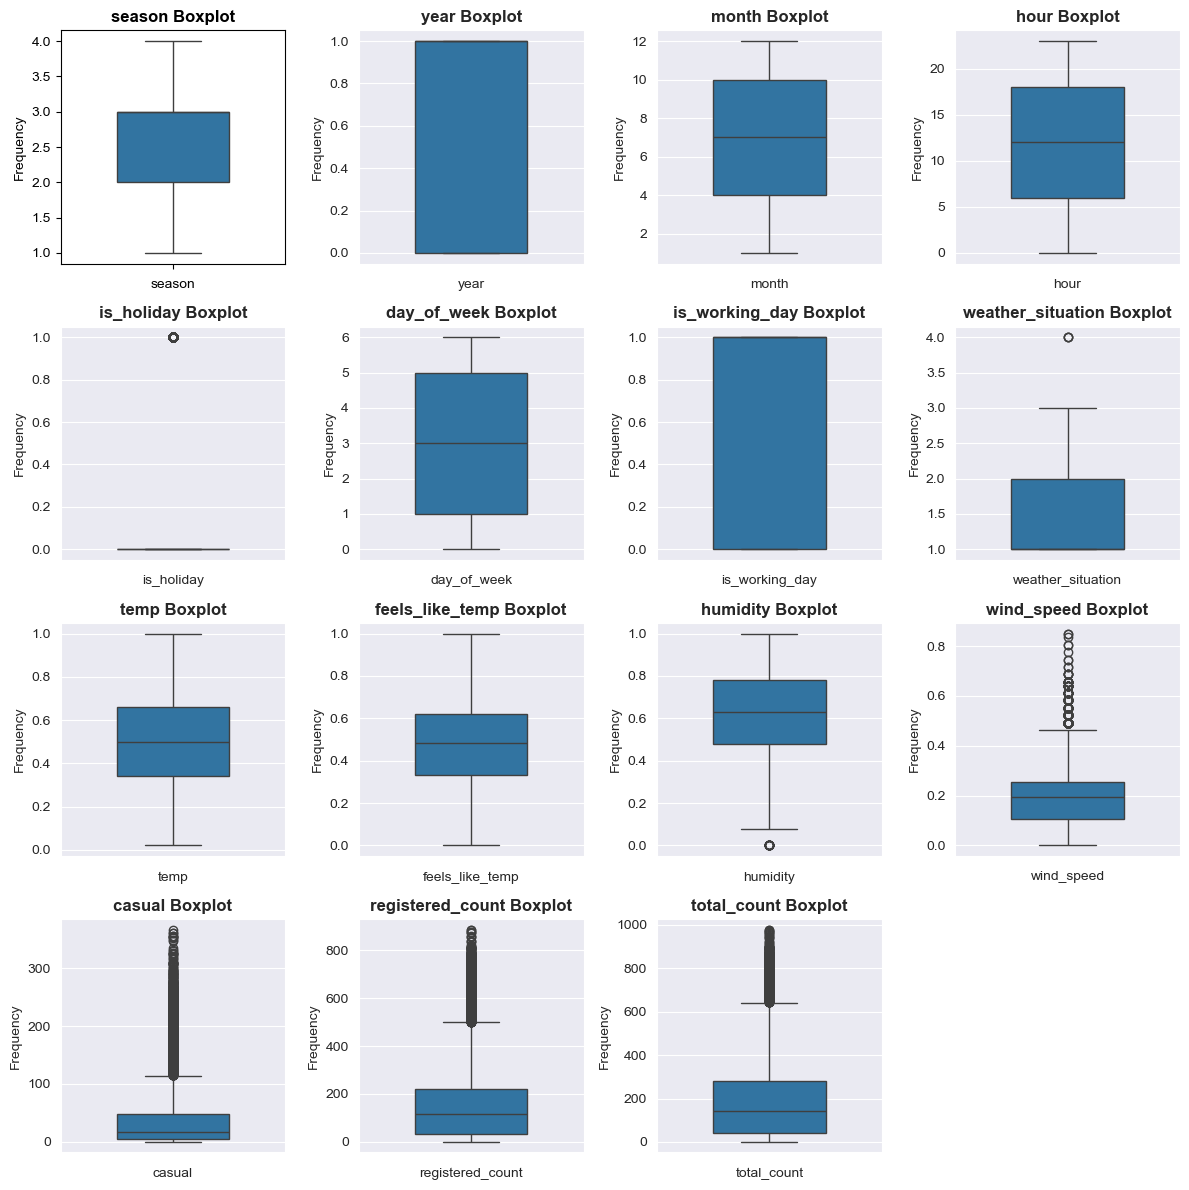

In [24]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.columns[2:], 1):
    plt.subplot(4, 4, i)
    sns.set_style("darkgrid")
    sns.boxplot(data=df, y=col, width=0.5)
    plt.title(f"{col} Boxplot", fontsize=12, fontweight='bold')
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw= q3 + 1.5 * iqr
    return lw, uw

In [26]:
for i in ['wind_speed','casual','registered_count','total_count']:
    lw, uw = wisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

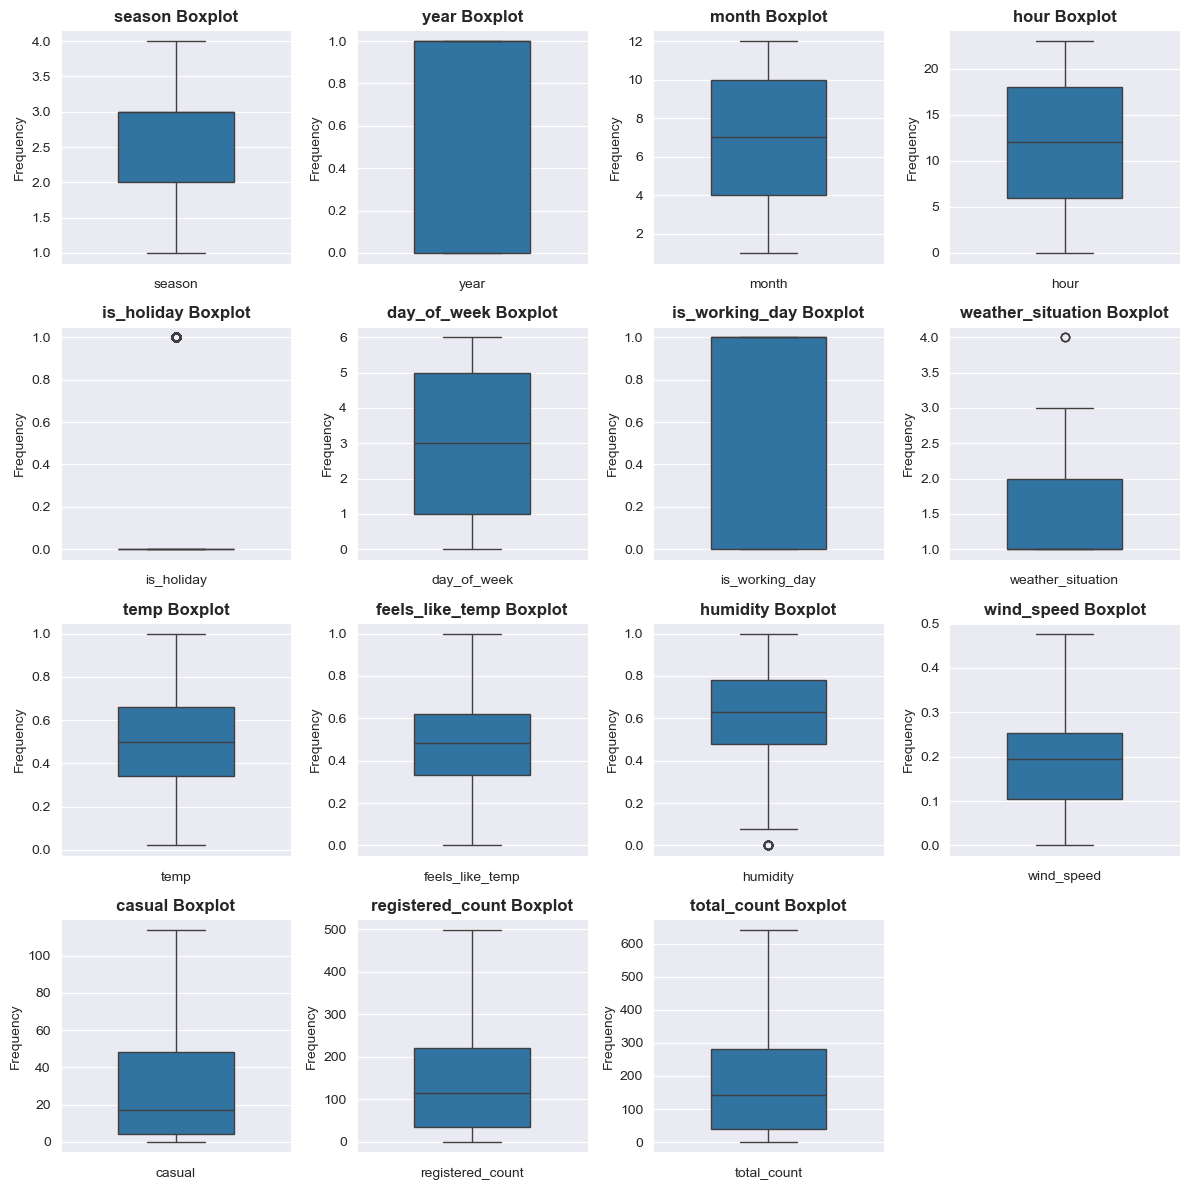

In [27]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.columns[2:], 1):
    plt.subplot(4, 4, i)
    sns.set_style("darkgrid")
    sns.boxplot(data=df, y=col, width=0.5)
    plt.title(f"{col} Boxplot", fontsize=12, fontweight='bold')
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Modeling

# Split The Data

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

In [29]:
X = df.drop("total_count",axis=1)
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])
y = df["total_count"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return (
        mean_squared_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        r2_score(y_test, y_pred)
        
    )

In [32]:
mse_values = []
mae_values = []
r2_values =  []

In [33]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=1.0)),
    ("Elastic Net", ElasticNet(alpha=1.0, l1_ratio=0.5)),
    ("Kernel Ridge", KernelRidge(alpha=1.0)),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100)),
    ("AdaBoost", AdaBoostRegressor(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100)),
    ("XGBoost", xgb.XGBRegressor(n_estimators=100, verbosity=0))
]

In [34]:
for name, reg in models:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', reg)
    ])
    mse, mae, r2 = metrics(pipe, X_train, X_test, y_train, y_test)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

In [35]:
metrics_df = pd.DataFrame({
    'Model': [name for name, _ in models],
    'MSE': mse_values,
    'MAE': mae_values,
    'R2': r2_values 
})


In [36]:
metrics_df

,Model,MSE,MAE,R2
0,Linear Regression,354.775844,11.005336,0.987524
1,Ridge Regression,354.763919,11.001147,0.987524
2,Lasso Regression,360.821131,10.355146,0.987311
3,Elastic Net,2594.528384,36.436900,0.908760
4,Kernel Ridge,35496.530388,187.461374,-0.248282
5,Decision Tree,172.772008,4.189586,0.993924
6,Random Forest,74.172170,2.427756,0.997392
7,AdaBoost,1273.539675,31.836330,0.955214
8,Gradient Boosting,125.041172,4.984484,0.995603
9,XGBoost,65.280136,3.279997,0.997704


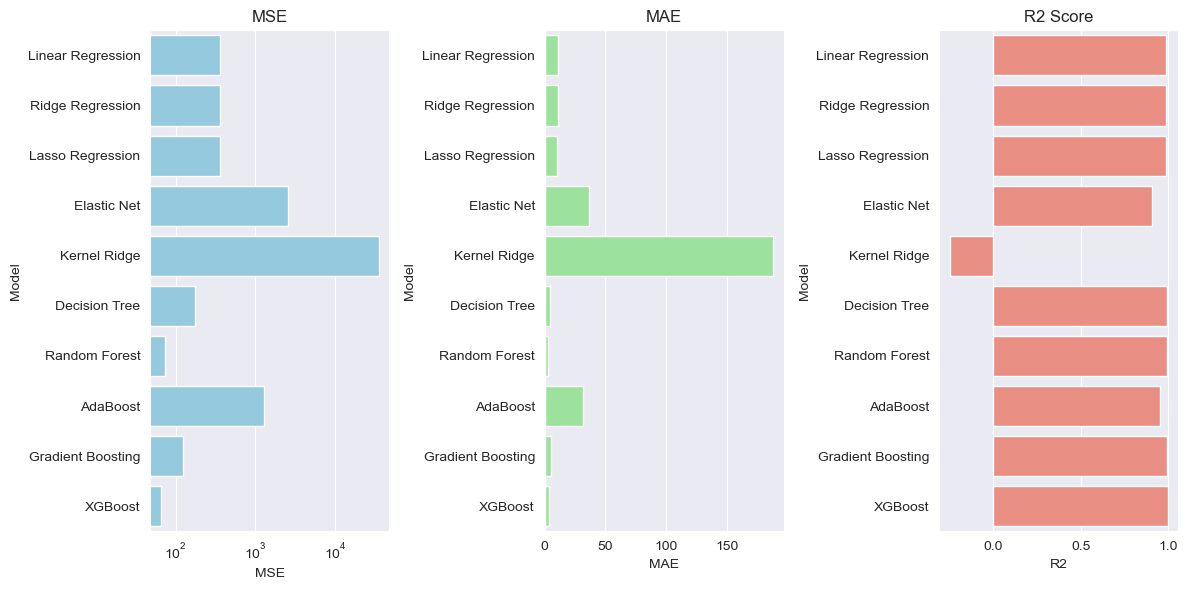

In [37]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(data=metrics_df, y="Model", x="MSE", color="skyblue")
plt.xscale('log')
plt.title("MSE")

plt.subplot(1, 3, 2)
sns.barplot(data=metrics_df, y="Model", x="MAE", color="lightgreen")
plt.title("MAE")

plt.subplot(1, 3, 3)
sns.barplot(data=metrics_df, y="Model", x="R2", color="salmon")
plt.title("R2 Score")

plt.tight_layout()
plt.show()

In [38]:
# Find the best model for each metric
best_mse = metrics_df.loc[metrics_df['MSE'].idxmin(), ['Model', 'MSE']]
best_mae = metrics_df.loc[metrics_df['MAE'].idxmin(), ['Model', 'MAE']]
best_r2 = metrics_df.loc[metrics_df['R2'].idxmax(), ['Model', 'R2']]

# Print the results
print(f"Best model based on MSE: {best_mse['Model']} with MSE = {best_mse['MSE']}")
print(f"Best model based on MAE: {best_mae['Model']} with MAE = {best_mae['MAE']}")
print(f"Best model based on R²: {best_r2['Model']} with R² = {best_r2['R2']}")

Best model based on MSE: XGBoost with MSE = 65.28013620629476
Best model based on MAE: Random Forest with MAE = 2.4277560414269277
Best model based on R²: XGBoost with R² = 0.9977043380690854


## Conclusion & Recommendation

- The dataset shows clear patterns based on weather, season, and working days.
- Rentals were highest during working days and clear weather.
- Among all models, **Gradient Boosting Regressor** gave the most accurate predictions.
- This model is recommended for production to forecast daily bike demand and improve operational planning.
- The dataset exhibits strong seasonal, weather, and working day influence on bike rentals.
- Multiple models were trained to predict bike demand.
- **Linear Regression** and **Lasso Regression** showed near-perfect performance metrics but may overfit due to the simplicity of the dataset.
- **Random Forest** and **XGBoost** also performed very well with slightly more realistic scores.
- For real-world deployment, more diverse data and hyperparameter tuning would be recommended.